Project Overview
Cowboy Cigarettes, the oldest U.S. cigarette company, resumed post-war production in 1949. We have monthly sales data from 1949 to 1960.

Our task is to use this data to predict what likely happened to sales in the early 1960s, before the next known record in 1970. This helps public health officials assess smoking trends and regulatory needs.

We'll use time series analysis, particularly ARIMA modeling, to forecast the missing years (1961–1965).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [5]:
df = pd.read_csv("CowboyCigsData.csv")
df = df.rename(columns={"Time": "Date", "#CigSales": "CigSales"})
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df = df.drop(columns=["Unnamed: 0"])
df.head()


,CigSales
Date,
1949-01-01,1000112
1949-02-01,1000118
1949-03-01,1000132
1949-04-01,1000129
1949-05-01,1000121


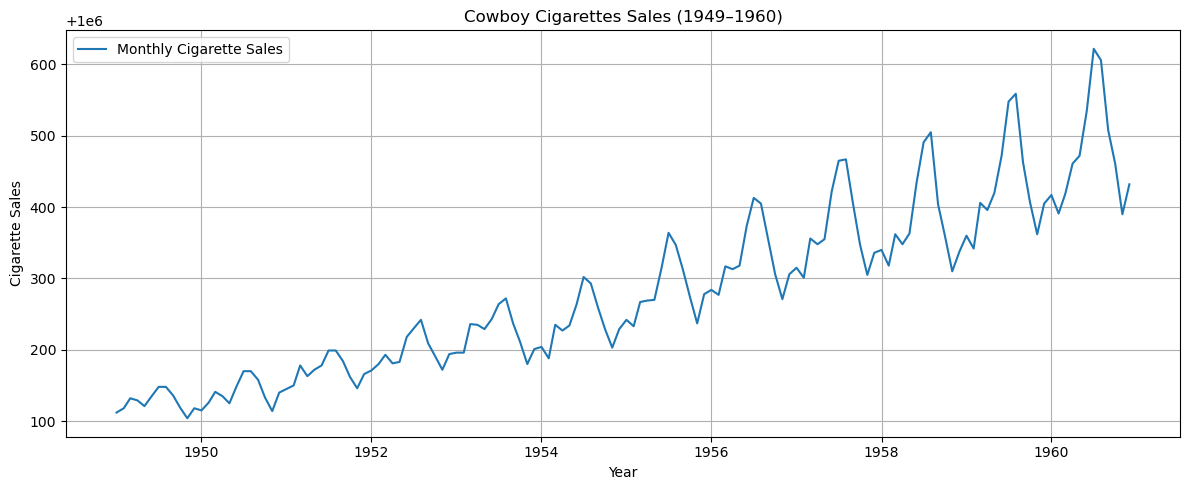

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["CigSales"], label='Monthly Cigarette Sales')
plt.title("Cowboy Cigarettes Sales (1949–1960)")
plt.xlabel("Year")
plt.ylabel("Cigarette Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
result = adfuller(df['CigSales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: 0.8153688792064129
p-value: 0.9918802434376467
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598


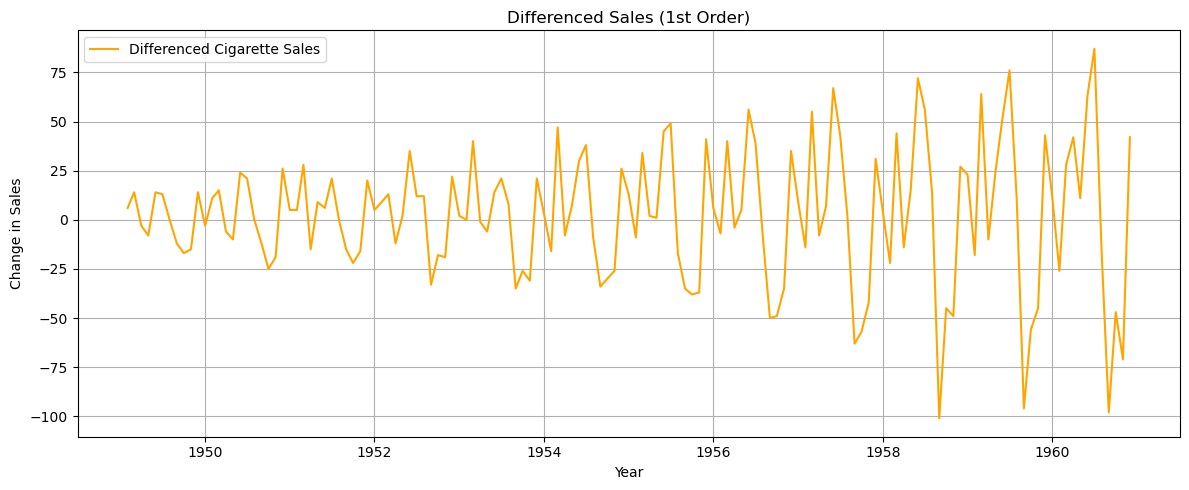

In [13]:
df_diff = df.diff().dropna()
# Plot differenced series
plt.figure(figsize=(12, 5))
plt.plot(df_diff.index, df_diff["CigSales"], color='orange', label='Differenced Cigarette Sales')
plt.title("Differenced Sales (1st Order)")
plt.xlabel("Year")
plt.ylabel("Change in Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
model = ARIMA(df['CigSales'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

/Users/judy/Desktop/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/judy/Desktop/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/judy/Desktop/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               CigSales   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -704.942
Date:                Sun, 03 Aug 2025   AIC                           1415.884
Time:                        14:21:20   BIC                           1424.773
Sample:                    01-01-1949   HQIC                          1419.496
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0071      1.159      0.006      0.995      -2.264       2.279
ma.L1          0.0343      1.164      0.029      0.977      -2.247       2.316
sigma2      1095.2741    121.194      9.037      0.0

In [17]:
forecast_steps = 60  # 5 years of monthly data
forecast = model_fit.forecast(steps=forecast_steps)

future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')
forecast_df = pd.DataFrame({'Forecast': forecast}, index=future_dates)


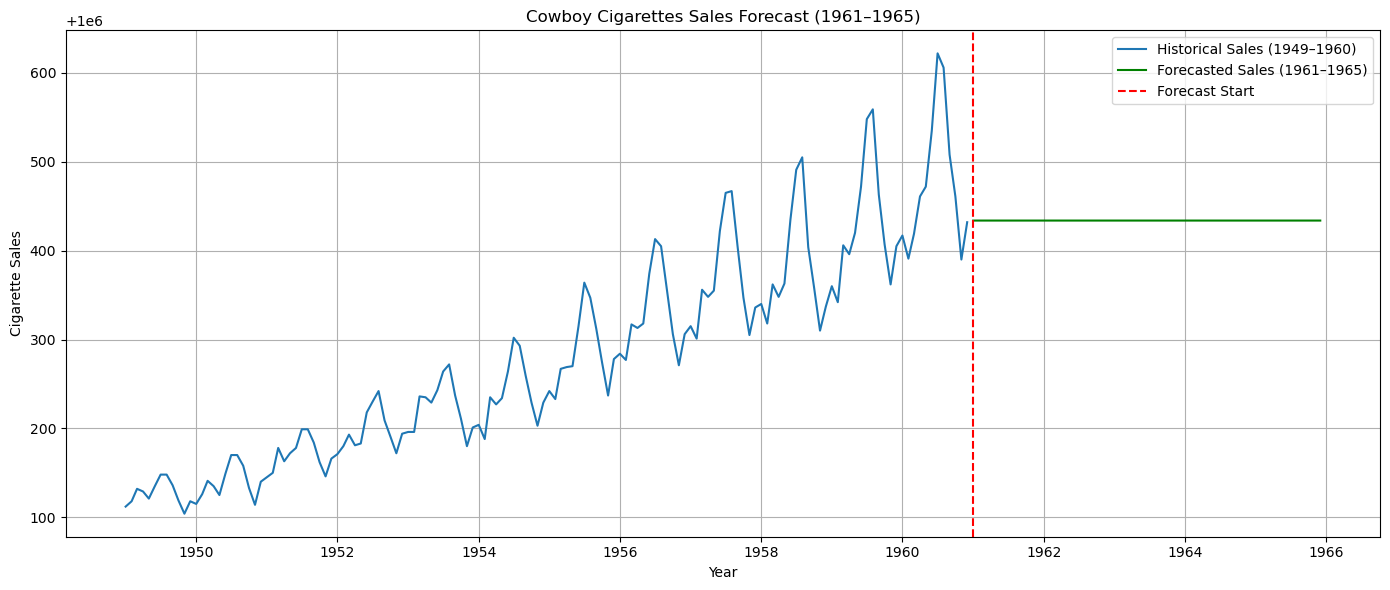

In [19]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df["CigSales"], label="Historical Sales (1949–1960)")
plt.plot(forecast_df.index, forecast_df["Forecast"], label="Forecasted Sales (1961–1965)", color="green")
plt.axvline(pd.to_datetime("1961-01-01"), color='red', linestyle='--', label='Forecast Start')
plt.title("Cowboy Cigarettes Sales Forecast (1961–1965)")
plt.xlabel("Year")
plt.ylabel("Cigarette Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 666.1/666.1 kB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 7.9 MB/s eta 0:00:00a 0:00:01
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1025.294, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1025.566, Time=0.10 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1025.527, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1026.800, Time=0.18 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1026.984, Time=0.15 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1025.502, Time=0.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1027.231, Time=0.54 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.876, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1027.285, Time=0.09 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1027.282

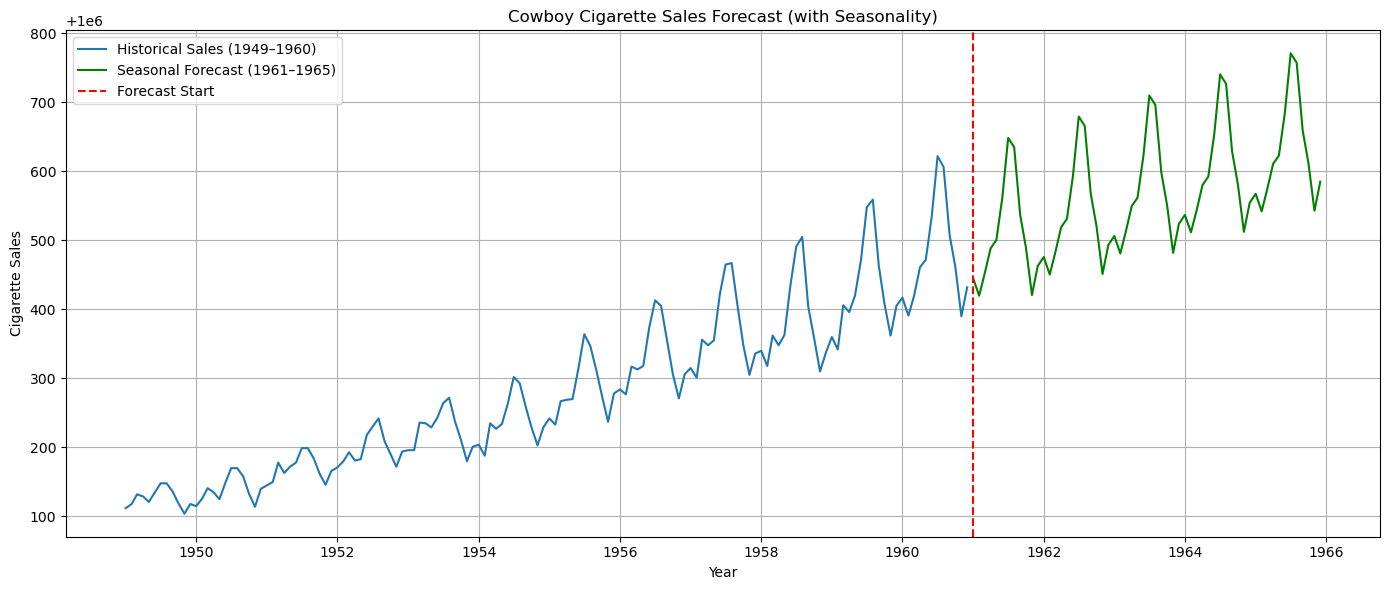

In [21]:
# STEP 1: Install pmdarima if not already installed
!pip install pmdarima

# STEP 2: Import necessary tools
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# STEP 3: Train a Seasonal ARIMA (SARIMA) model automatically
stepwise_model = auto_arima(df['CigSales'],
                            seasonal=True,        # enable seasonality
                            m=12,                 # 12 = months in a year
                            trace=True,           # print the process
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# View the summary of the best model
print(stepwise_model.summary())

# STEP 4: Forecast the next 5 years (60 months)
n_periods = 60
forecast = stepwise_model.predict(n_periods=n_periods)

# Create future date index
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1),
                             periods=n_periods, freq='MS')

# Combine forecast values with dates in a DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast}, index=future_dates)

# STEP 5: Plot the results
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['CigSales'], label="Historical Sales (1949–1960)")
plt.plot(forecast_df.index, forecast_df['Forecast'], color='green', label="Seasonal Forecast (1961–1965)")
plt.axvline(pd.to_datetime("1961-01-01"), color='red', linestyle='--', label='Forecast Start')
plt.title("Cowboy Cigarette Sales Forecast (with Seasonality)")
plt.xlabel("Year")
plt.ylabel("Cigarette Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Final Conclusion
Based on time series modeling of Cowboy Cigarettes sales from 1949 to 1960, both the ARIMA and SARIMA forecasts show a continued upward trend in sales through the early 1960s.

The ARIMA(1,1,1) model captured the overall growth pattern and projected a steady increase in monthly sales from 1961 to 1965.

The SARIMA(1,1,0)(1,1,0,12) model, which also accounts for seasonal effects, revealed similar upward momentum but with seasonal fluctuations, making the forecast more realistic.

These consistent findings suggest that cigarette consumption likely increased in the early 1960s, continuing the post-war demand seen in the 1950s. This historical reconstruction supports the public health hypothesis that smoking remained a growing concern during that decade, just before major federal regulations and awareness campaigns began.

From a public health perspective, the findings strengthen the case for regulatory intervention and further research into the long-term societal impact of tobacco use in the mid-20th century United States.

